#### Introduction

# Project Title:
# Understanding and Predicting Student Performance in History and Geography

Introduction

Teaching goes beyond simply imparting or communicating knowledge to students; it also involves monitoring their cognitive development and academic progress. Tools such as evaluations, tests, homework, and exams are essential in assessing how well students understand and apply what they learn. This project focuses on analyzing students' performance in the History and Geography subject to uncover patterns and predictors of academic success. By examining historical academic records, the study aims to identify key factors influencing student outcomes and provide actionable insights for educators and policymakers.


What fascinates me about this project is its potential to uncover meaningful trends in students' learning patterns and performance. Education is a powerful tool for individual and societal transformation, and understanding the elements that shape student achievement can lead to more effective teaching strategies. By exploring differences in performance across genders and academic terms, and evaluating the influence of continuous assessments (tests) and final evaluations (exams), this project has the potential to reveal how educational interventions can be better targeted and more equitable. It also offers an opportunity to apply data analysis techniques in a real-world educational context, which aligns with my passion for using data to drive meaningful change.

Objectives:

1. To compare performance by gender.

2. To compare students' performance in the first, second, and third semesters.

3. Build a predictive model to monitor the performance of student based on their test and exam score.


Study Area/Scope:
A sample of public high school students in Algeria.

Data Source:
This study uses a secondary dataset available on Kaggle:https://www.kaggle.com/datasets/fundal/students-annual-score-in-history-geography-subject

The dataset contains information about the student gender, their three semester test and exams which were recoded in percentage and the annual score given as: Annual score = ((test_01 + test_02 + test_03) + 2*(exam_01 + exam_02 + exam_03))/9 and their status (1-pass, 0-fail).

METHODOLOGY
This project adopts a structured data analysis and machine learning approach to address the stated objectives. The methodology consists of three main phases: Exploratory Data Analysis (EDA), Comparative Statistical Analysis, and Predictive Modeling using supervised machine learning.

1. Exploratory Data Analysis (EDA)
To address Objectives 1 and 2, EDA will be conducted to uncover underlying patterns and trends in the dataset. This phase will involve:

Data cleaning and preprocessing, including handling missing values, encoding categorical variables (e.g., gender), and ensuring data consistency across semesters.

Generating descriptive statistics and visualizations (such as box plots, histograms, and line charts) to compare performance metrics across genders and semesters.

2. Comparative Performance Analysis
For Objective 1, students' scores will be grouped by gender, and performance metrics (mean, median, variance) will be compared.

For Objective 2, student performance will be analyzed across the first, second, and third semesters, identifying trends and progress using both visual and statistical summaries.

3. Predictive Modeling
To address Objective 3, supervised machine learning techniques will be employed to develop a classification model that predicts student performance based on their test and exam scores. This phase will include:

Feature selection and engineering to identify the most relevant predictors.

Splitting the dataset into training and testing sets (e.g., 80/20 split).

Applying various supervised learning algorithms, including:

Logistic Regression

Random Forest

XGBoast

Artificial Neural Network

Model evaluation using appropriate performance metrics such as Accuracy, F1-score, Precision, Recall, and Confusion Matrix for classification tasks.

Implementing cross-validation to ensure model robustness and generalizability.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Exploratory Data Analysis

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Students Annual Score in History geography subject.csv")
# data = pd.read_csv("/content/Students Annual Score in History geography subject.csv")

In [12]:
print("The dataset has {} number of observation and {} variables (column)".format(data.shape[0], data.shape[1]))

print(data.dtypes)

The dataset has 634 number of observation and 10 variables (column)
Gender           object
Test_01         float64
Exam_01         float64
Test_02         float64
Exam_02         float64
Test_03         float64
Exam_03         float64
Annual_Score    float64
Success           int64
Unnamed: 9      float64
dtype: object


In [13]:
data.isna().sum()

,0
Gender,0
Test_01,0
Exam_01,0
Test_02,0
Exam_02,0
Test_03,0
Exam_03,0
Annual_Score,0
Success,0
Unnamed: 9,634


In [14]:
data.columns

Index(['Gender', 'Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03',
       'Exam_03', 'Annual_Score', 'Success', 'Unnamed: 9'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        634 non-null    object 
 1   Test_01       634 non-null    float64
 2   Exam_01       634 non-null    float64
 3   Test_02       634 non-null    float64
 4   Exam_02       634 non-null    float64
 5   Test_03       634 non-null    float64
 6   Exam_03       634 non-null    float64
 7   Annual_Score  634 non-null    float64
 8   Success       634 non-null    int64  
 9   Unnamed: 9    0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 49.7+ KB


In [16]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.head()

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success,Unnamed: 9
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1,NaN
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1,NaN
2,F,67.50,58.75,42.50,45.00,85.0,50.00,55.83,1,NaN
3,F,58.75,87.50,75.00,76.25,100.0,81.25,80.42,1,NaN
4,F,90.00,83.75,70.00,93.75,90.0,88.75,86.94,1,NaN


In [18]:
### Dropping columns that has all its entries as a missing values
df= data.dropna(axis=1, how = 'all')
df.head(2)

,Gender,Test_01,Exam_01,Test_02,Exam_02,Test_03,Exam_03,Annual_Score,Success
0,F,72.50,93.75,81.25,86.25,100.0,86.25,87.36,1
1,F,68.75,81.25,65.00,56.25,90.0,71.25,71.25,1


### Quantitative Analysis

Descriptive Analysis

In [19]:
# Select only numeric columns(integer, floats and complex) in the dataset (excluding object type)
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.drop('Success', axis=1)
numeric_df.head()
# Create summary DataFrame with min, max, and range
summary = pd.DataFrame({
    'min': numeric_df.min(),
    'max': numeric_df.max(),
    'range': numeric_df.max() - numeric_df.min(),
    'Skewness': round(numeric_df.skew(),3),
    'Kurtosis': round(numeric_df.kurt(),3)
})

print(summary)


               min     max   range  Skewness  Kurtosis
Test_01       0.00  100.00  100.00    -0.352    -0.496
Exam_01       0.00  100.00  100.00     0.589     0.229
Test_02       0.00  101.25  101.25    -0.143    -0.774
Exam_02       0.00   98.75   98.75     0.979     0.677
Test_03       0.00  100.00  100.00    -0.691    -0.952
Exam_03       0.00   98.75   98.75     0.753     0.063
Annual_Score  2.92   95.28   92.36     0.331    -0.225


** Interpretation **

The test score of the student are negagtively skewed while their exam score is positively skewed. this therefore shows that the score of the student does not follows the normal distribution and there could be present of an outlier as the kurtosis values are less than 3 (platykurtic distribution).

In [20]:
## A quick descriptive analysis of the numeric variables in the dataset, round up to 2 decimal point
round(numeric_df.describe().transpose(),2)


,count,mean,std,min,25%,50%,75%,max
Test_01,634.0,61.61,23.28,0.00,45.00,62.50,80.00,100.00
Exam_01,634.0,40.91,20.05,0.00,26.88,40.00,48.59,100.00
Test_02,634.0,54.54,27.02,0.00,35.00,56.25,75.00,101.25
Exam_02,634.0,31.19,21.37,0.00,15.00,27.50,42.50,98.75
Test_03,634.0,66.61,34.12,0.00,40.00,78.12,100.00,100.00
Exam_03,634.0,34.43,23.64,0.00,16.25,31.88,45.62,98.75
Annual_Score,634.0,43.98,18.25,2.92,30.92,42.92,56.36,95.28


**Interpretation**

The descriptive statistic shows that there are student(s) who has extreme high score in their three exams compared to other student. This is because there is a wide gap between the 75% score and the maximum exam score of the student.

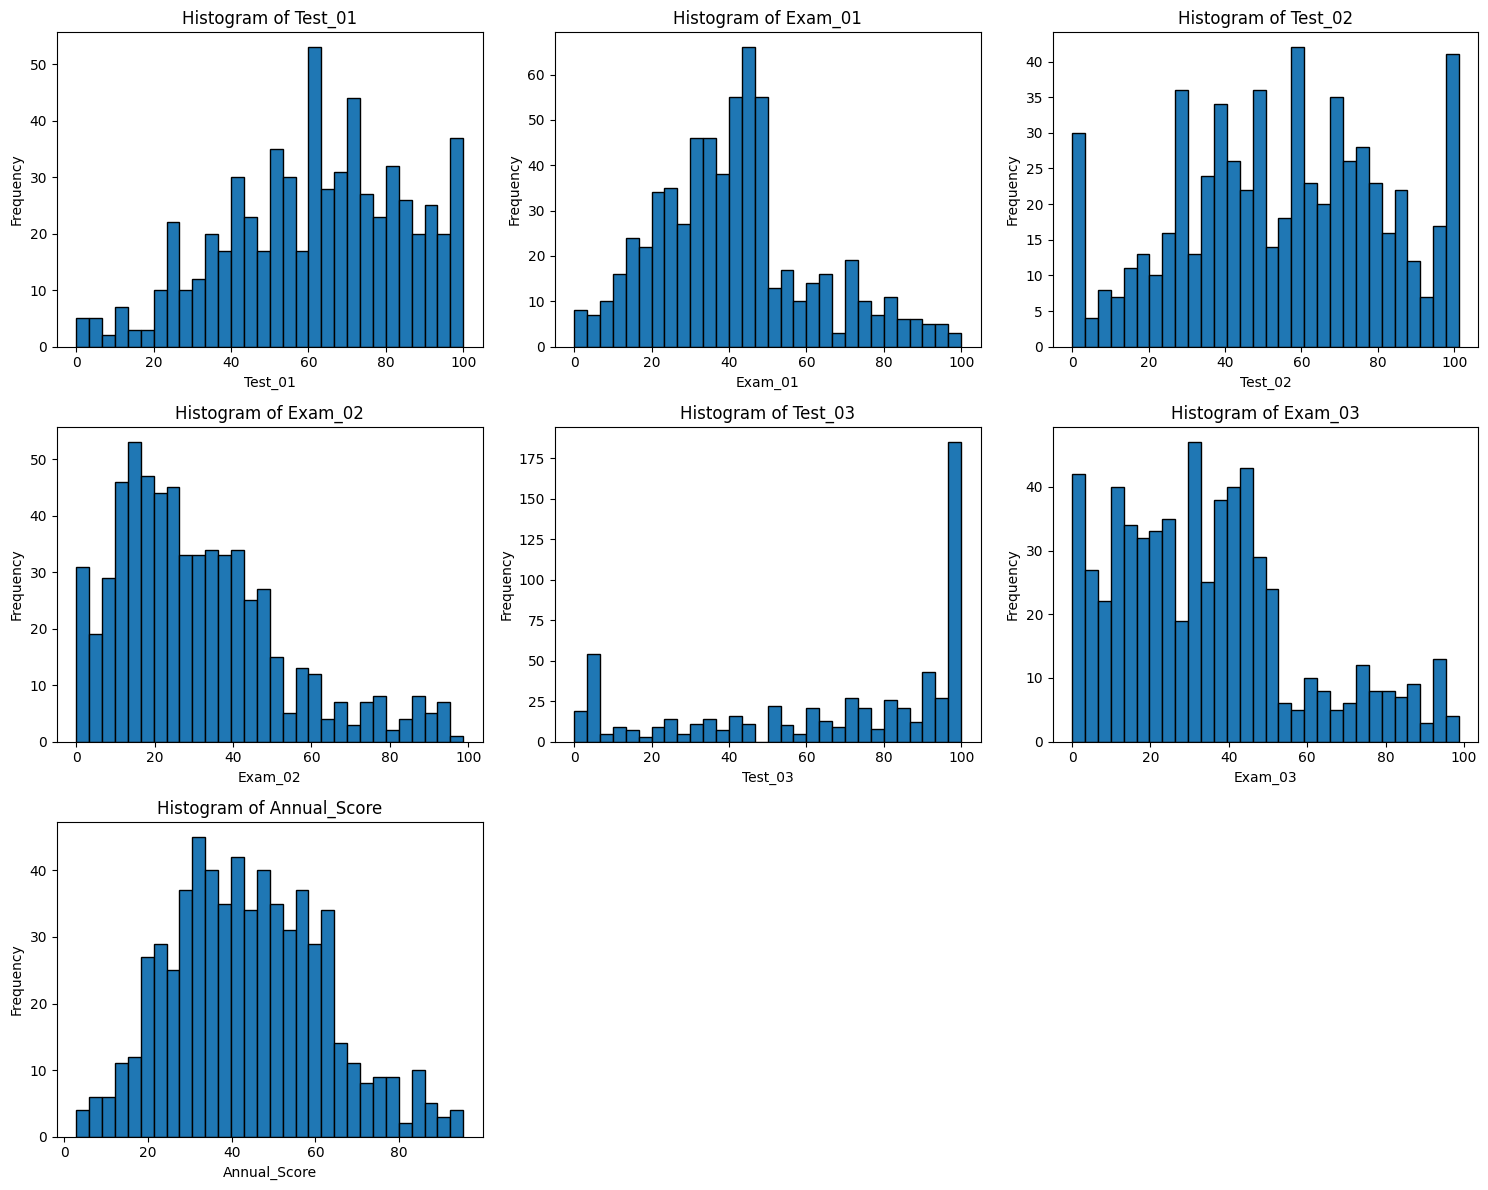

In [21]:
## Using Histogram to determine the distribution of the numeric variables in the dataset.
# Set up the plotting area
num_cols = len(numeric_df.columns)
n_cols = 3  # number of columns in plot grid
n_rows = (num_cols + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(numeric_df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


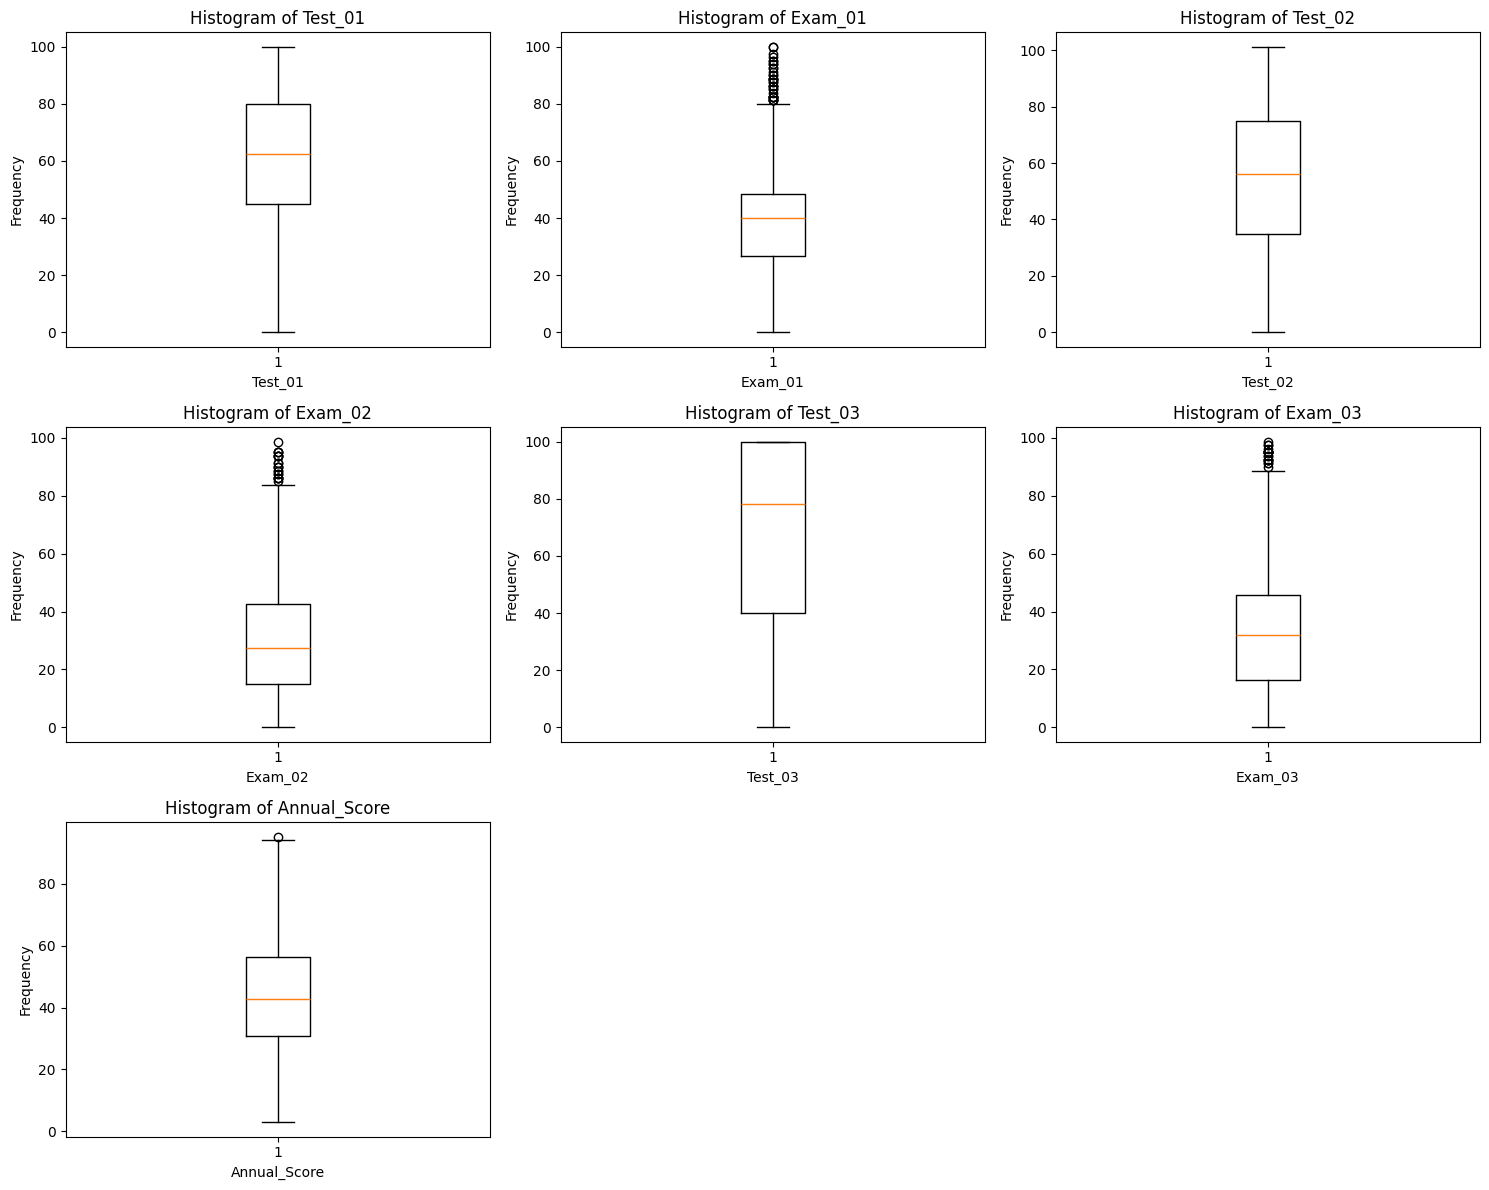

In [22]:
## Using Boxplot to determine the distribution of the numeric variables in the dataset.
# Set up the plotting area
num_cols = len(numeric_df.columns)
n_cols = 3  # number of columns in plot grid
n_rows = (num_cols + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(numeric_df[col].dropna())
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpretation**

It can be visually observed that there could be an oulier in the exam score of the student as there are points after the maximum values of the boxplot.

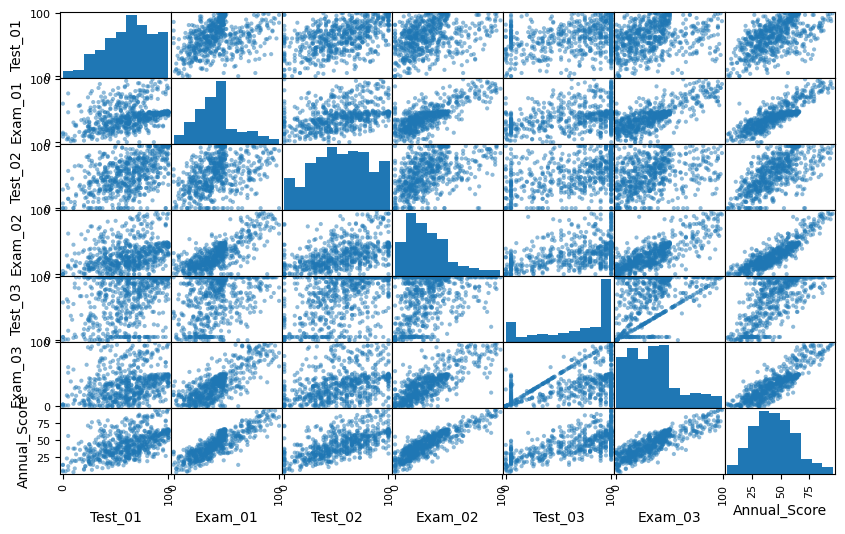

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(numeric_df, figsize=(10, 6), diagonal='hist')
plt.show()


The descriptive Analaysis of the dataset shows that the distribution of the numerical variables does not follow the normal distibution and some of the scores of the student is skewed. It was also observed that the student often performs well in their test to exams.

### Qualitative Analysis

        Count  Percentage
Gender                   
F         438       69.09
M         196       30.91


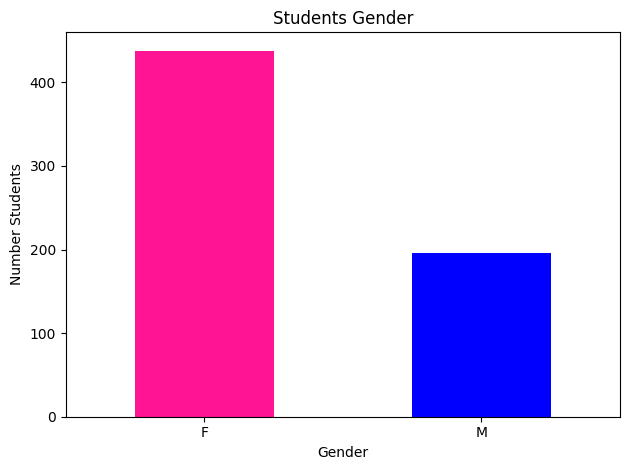

In [24]:
# Count number of males and females
gender = df['Gender'].value_counts()

# Calculate percentage
gender_percent = (gender / df.shape[0]) * 100

# Print count and percentage
gender_df = pd.DataFrame({
    'Count': gender,
    'Percentage': round(gender_percent,2)
}).sort_values(by='Count', ascending=False)

print(gender_df)

# Plot
gender.plot(kind='bar', color=['deeppink', 'blue'])
plt.title('Students Gender')
plt.xlabel('Gender')
plt.ylabel('Number Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretation**

The gender distribution of the class is not balanced as there are more females to males. This could be that more females are encouraged to study geography than males in teh study area.

         Count  Percentage
Success                   
0          402       63.41
1          232       36.59


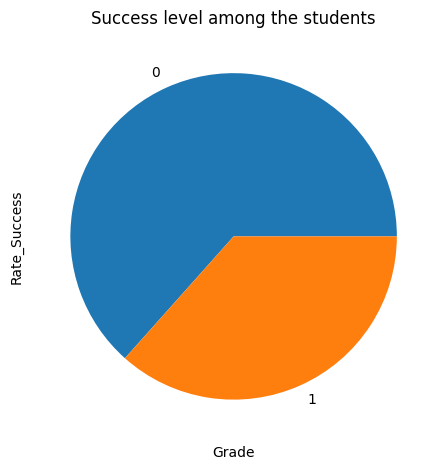

In [25]:
# ** Proportion of success and failure of the class **
Rate_Success = df['Success'].value_counts()
# Calculate percentage
Success_percent = (Rate_Success / df.shape[0]) * 100

# Print count and percentage
Success_df = pd.DataFrame({
    'Count': Rate_Success,
    'Percentage': round(Success_percent,2)
}).sort_values(by='Count', ascending=False)

print(Success_df)


# Plot
Rate_Success.plot(kind='pie', color=['deeppink', 'blue'])
plt.title('Success level among the students')
plt.xlabel('Grade')
plt.ylabel('Rate_Success')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretation**

The failure rate is 26.82% higher than the success rate.


# Objective One: To compare performance by gender



**Annual score performance of male and female**

In [26]:
# Group by Gender and calculate basic performance metrics
gender_stats = df.groupby('Gender')['Annual_Score'].agg(['count', 'mean', 'median', 'min', 'max'])
print(gender_stats)


        count       mean  median   min    max
Gender                                       
F         438  45.593630  44.475  4.03  95.28
M         196  40.374388  38.400  2.92  91.39


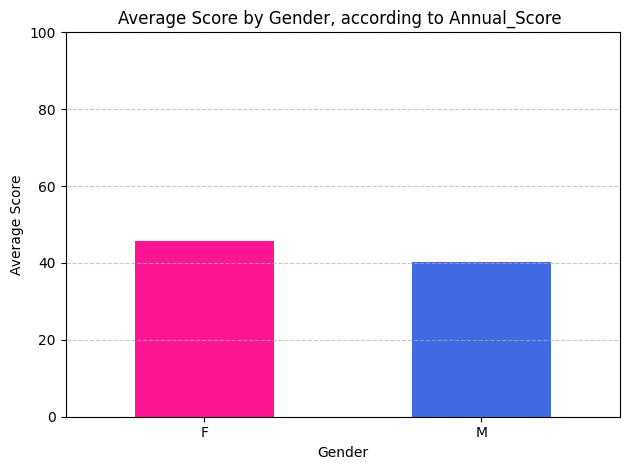

In [27]:
avg_scores = df.groupby('Gender')['Annual_Score'].mean()

avg_scores.plot(kind='bar', color=['deeppink', 'royalblue'])
plt.title('Average Score by Gender, according to Annual_Score ')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


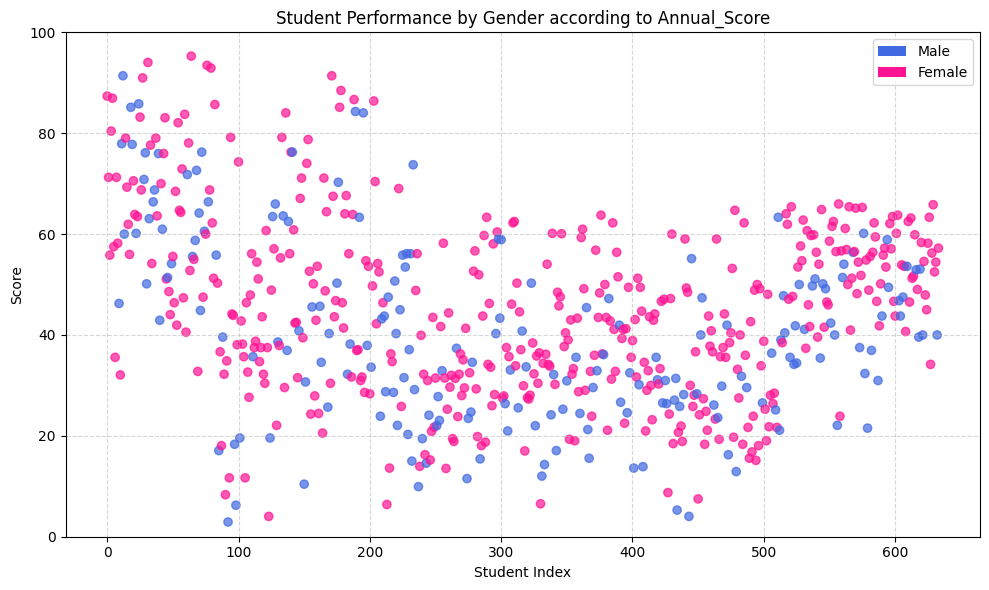

In [28]:
# Create color map based on gender
colors = df['Gender'].map({'M': 'royalblue', 'F': 'deeppink'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Annual_Score'], c=colors, alpha=0.7)

# Add labels and legend
plt.title('Student Performance by Gender according to Annual_Score')
plt.xlabel('Student Index')
plt.ylabel('Score')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Male', 'Female'], loc='upper right')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='royalblue', label='Male'),
    Patch(facecolor='deeppink', label='Female')
]
plt.legend(handles=legend_elements)

plt.tight_layout()
plt.show()


**Performance of males and female in 1st, 2nd, 3rd exam**

Gender           F          M
Exam_01  41.535342  39.521327
Exam_02  32.224703  28.877296
Exam_03  34.634680  33.976429


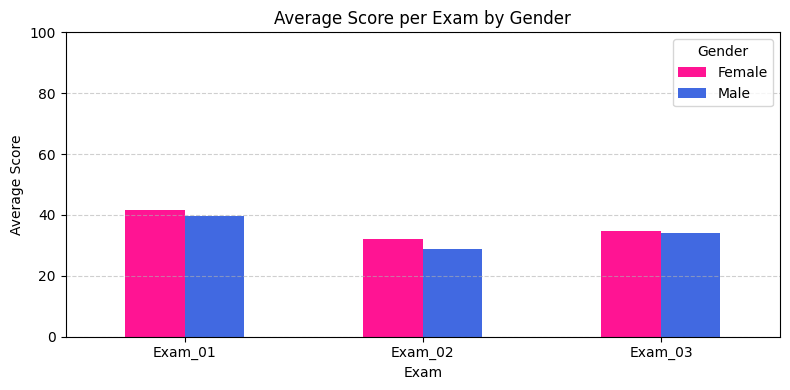

In [40]:
# Calculate average scores per exam by gender and transpose for plotting
avg_scores_gender = df.groupby('Gender')[['Exam_01', 'Exam_02', 'Exam_03']].mean().T
print(avg_scores_gender)

# Plot grouped bar chart
avg_scores_gender.plot(kind='bar', figsize=(8, 4), color=['deeppink', 'royalblue'])  # F, M

plt.title('Average Score per Exam by Gender')
plt.ylabel('Average Score')
plt.xlabel('Exam')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add correct legend (F = deeppink, M = royalblue)
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.tight_layout()
plt.show()




**Performance of male and female in the first, second, and third  test**

In [30]:
# Step 1: Group by Gender and calculate mean for tests
gender_test_mean= df.groupby('Gender')[['Test_01', 'Test_02', 'Test_03']].mean().T
print(gender_test_mean)

Gender           F          M
Test_01  65.435502  53.051276
Test_02  58.744292  45.140306
Test_03  69.372603  60.427296


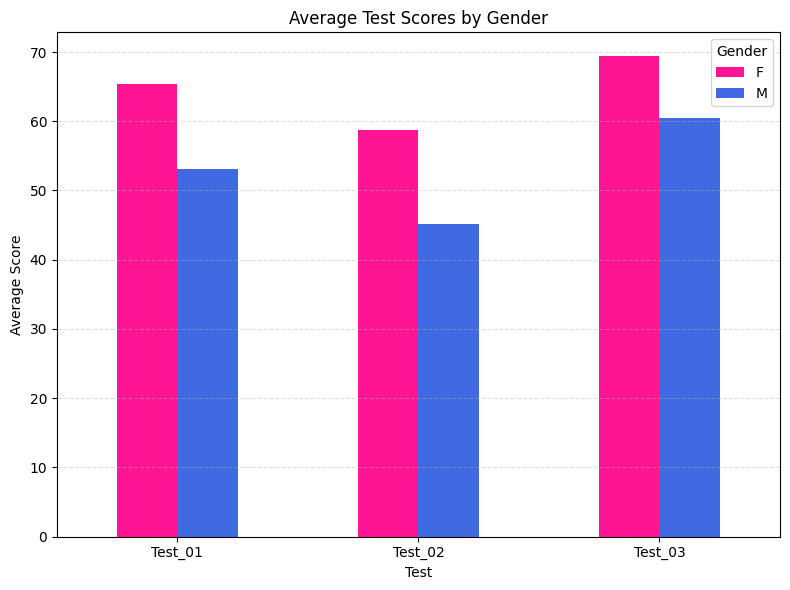

In [31]:
# Define gender color map
gender_colors = {
    'F': 'deeppink',
    'M': 'royalblue'
}

# Apply color map to gender columns
colors = list(pd.Series(gender_colors).reindex(gender_test_mean.columns))

# Plot
gender_test_mean.plot(kind='bar', figsize=(8, 6), color=colors)
plt.title('Average Test Scores by Gender')
plt.xlabel('Test')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


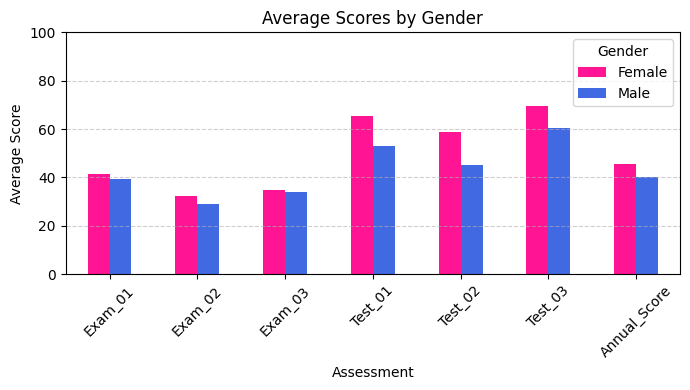

In [45]:
import matplotlib.pyplot as plt

# Include Exam_01 to Exam_03, Test_01 to Test_03, and Annual_Score
avg_scores_gender = df.groupby('Gender')[
    ['Exam_01', 'Exam_02', 'Exam_03', 'Test_01', 'Test_02', 'Test_03', 'Annual_Score']
].mean().T

# Plot grouped bar chart
avg_scores_gender.plot(kind='bar', figsize=(7, 4), color=['deeppink', 'royalblue'])  # F, M

plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Assessment')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Correct legend
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.tight_layout()
plt.show()


***Interpretation***:
From the analysis and visualizations above, it is observed that **female students performed better on average than male students** in the **annual score**, across all **tests** (Test_01, Test_02, and Test_03) and as well as across all the, **exams** (Exam_01, Exam_02, and Exam_03).


# Objective Two: To compare students' performance in the first, second, and third




First_Semester     51.259826
Second_Semester    42.864251
Third_Semester     50.519180
dtype: float64


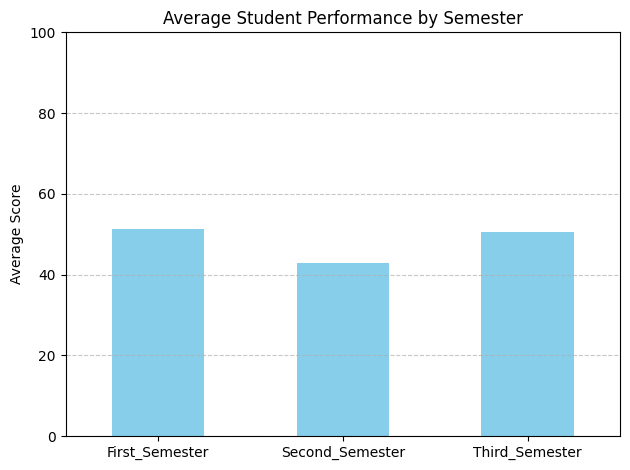

In [46]:
# Average performance per semester per student
df['First_Semester'] = (df['Test_01'] + df['Exam_01']) / 2
df['Second_Semester'] = (df['Test_02'] + df['Exam_02']) / 2
df['Third_Semester'] = (df['Test_03'] + df['Exam_03']) / 2

semester_avg = df[['First_Semester', 'Second_Semester', 'Third_Semester']].mean()
print(semester_avg)

import matplotlib.pyplot as plt

semester_avg.plot(kind='bar', color='skyblue')
plt.title('Average Student Performance by Semester')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


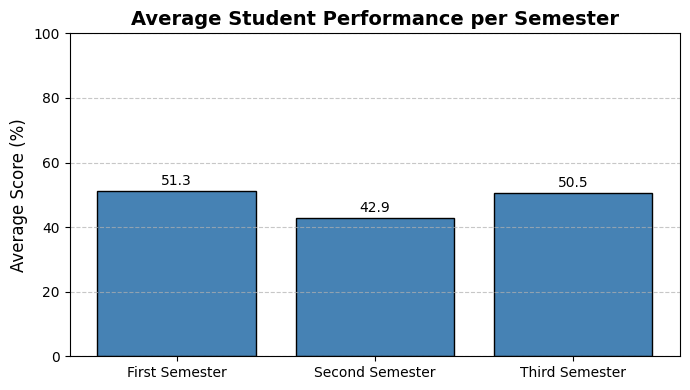

In [51]:
# Calculate average performance per semester per student
df['First_Semester'] = (df['Test_01'] + df['Exam_01']) / 2
df['Second_Semester'] = (df['Test_02'] + df['Exam_02']) / 2
df['Third_Semester'] = (df['Test_03'] + df['Exam_03']) / 2

# Compute mean scores across all students for each semester
semester_avg = df[['First_Semester', 'Second_Semester', 'Third_Semester']].mean()
semester_avg.index = ['First Semester', 'Second Semester', 'Third Semester']  # Clean labels

# Plotting the semester-wise average scores
plt.figure(figsize=(7, 4))
bars = plt.bar(semester_avg.index, semester_avg.values, color='steelblue', edgecolor='black')

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Styling
plt.title('Average Student Performance per Semester', fontsize=14, weight='bold')
plt.ylabel('Average Score (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**performance in the first, second, and third semesters**

In [47]:
# Select relevant columns
columns = ['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03', 'Annual_Score']

# Calculate correlation matrix
correlation = df[columns].corr()

# Display only how each score relates to Annual_Score
impact_on_final = correlation['Annual_Score'].sort_values(ascending=False)
print(impact_on_final)



Annual_Score    1.000000
Exam_02         0.879792
Exam_03         0.865737
Exam_01         0.854841
Test_02         0.648142
Test_03         0.627012
Test_01         0.538037
Name: Annual_Score, dtype: float64


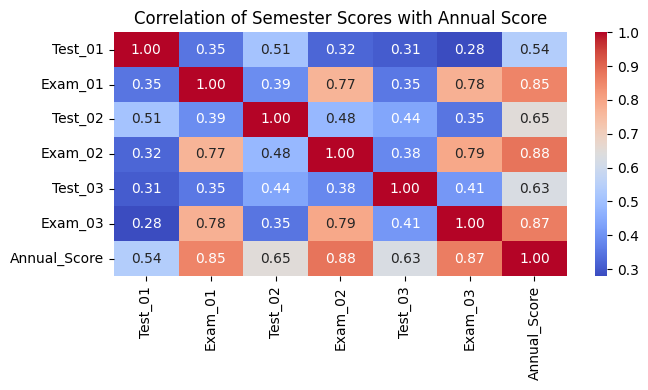

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

score_columns = ['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03', 'Annual_Score']

plt.figure(figsize=(7, 4))
sns.heatmap(df[score_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Semester Scores with Annual Score')
plt.tight_layout()
plt.show()



In [49]:
X = df[['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03']]
y = df['Annual_Score']

model = LinearRegression()
model.fit(X, y)

# Display coefficient (impact) of each score
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))


Exam_03    0.222228
Exam_01    0.222221
Exam_02    0.222218
Test_01    0.111115
Test_03    0.111109
Test_02    0.111104
dtype: float64


Interpretation:
The average student performance across the three semesters reveals a noticeable pattern:

* In the first semester, students had an average score of 51.26, suggesting a moderately **strong start** to the academic year.

* The second semester experienced a **significant dro**p to 42.86, indicating a decline in overall performance. This could be due to increased academic pressure, lack of motivation, or other mid-year challenges.

* Interestingly, in the third semester, performance rebounded to 50.52, **nearly reaching the initial first semester level**. This suggests that students may have recovered academically, possibly due to end-of-year motivation, exam preparation, or targeted interventions.

# Objective Three:  To understand the impact of test and exam scores during each semester on students' final results


**Performance of students in first, second, and third terms exams**(do we need this)





In [36]:
# Summary stats for each exam
exam_performance_summary = df[['Exam_01', 'Exam_02', 'Exam_03']].agg(['mean', 'median', 'max', 'min']).T
print(exam_performance_summary)


              mean  median     max  min
Exam_01  40.912713   40.00  100.00  0.0
Exam_02  31.189858   27.50   98.75  0.0
Exam_03  34.431183   31.88   98.75  0.0


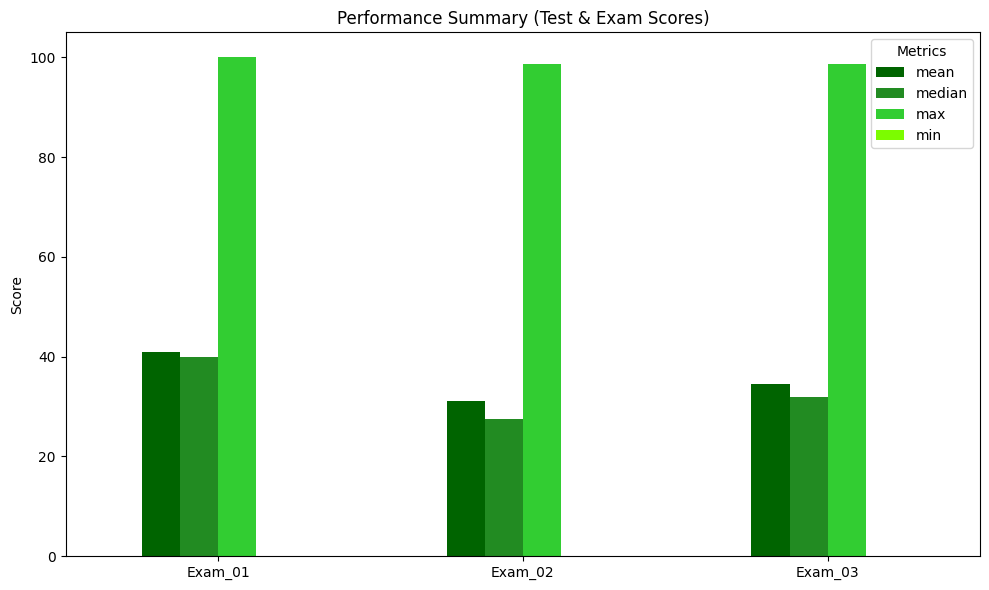

In [37]:
# Define shades of green
green_shades = ['#006400', '#228B22', '#32CD32', '#7CFC00']  # Dark to light green

# Plot
exam_performance_summary.plot(kind='bar', figsize=(10, 6), color=green_shades)
plt.title('Performance Summary (Test & Exam Scores)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()




Option(2)

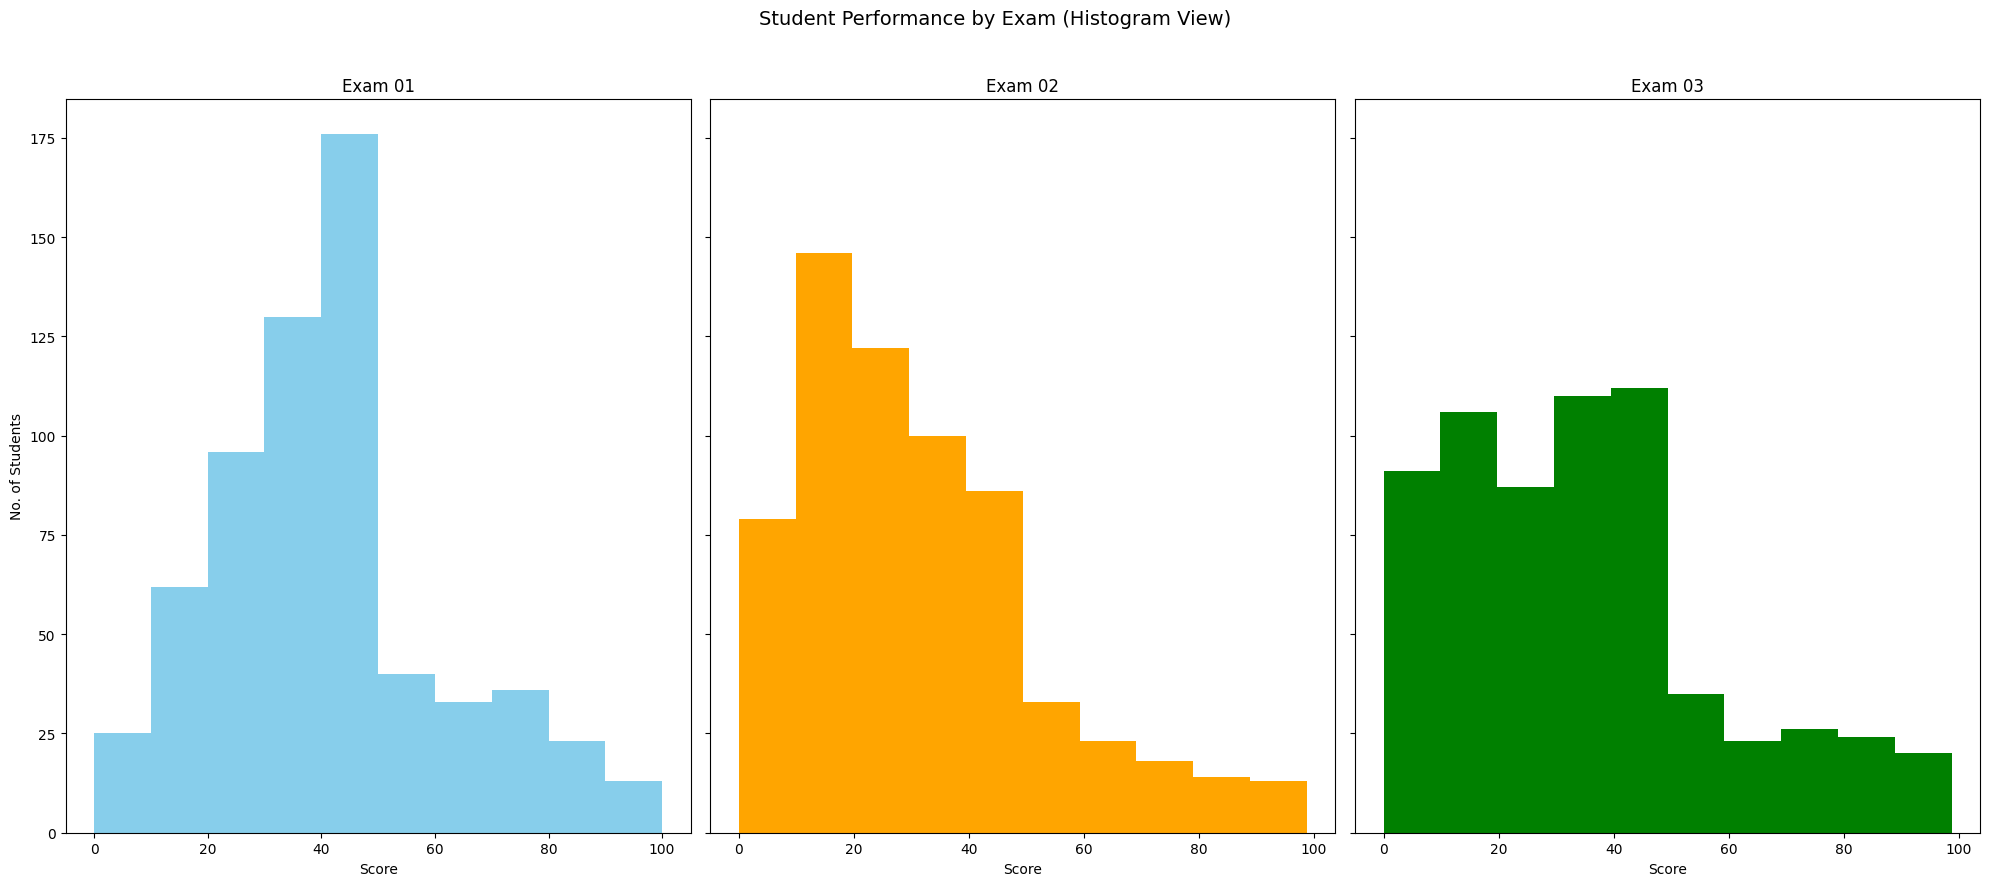

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(20, 9), sharey=True)

axes[0].hist(df['Exam_01'], bins=10, color='skyblue')
axes[0].set_title('Exam 01')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('No. of Students')

axes[1].hist(df['Exam_02'], bins=10, color='orange')
axes[1].set_title('Exam 02')
axes[1].set_xlabel('Score')

axes[2].hist(df['Exam_03'], bins=10, color='green')
axes[2].set_title('Exam 03')
axes[2].set_xlabel('Score')

plt.suptitle('Student Performance by Exam (Histogram View)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


### **Modelling**

Identifying target variable and the features.

Performing classification supervise learning using logistic regression, Random Forest, XGBoast, and Artificail Neural Network (ANN)

Model Evaluation and Selection

In [39]:
## Encoding the gender varaible
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
print(df['Gender_encoded'])
X = df.drop(['Success', 'Gender','Annual_Score', 'First_Semester', 'Second_Semester', 'Third_Semester'], axis=1)
print(X.columns)
y = df['Success']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=132)

NameError: name 'LabelEncoder' is not defined

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train)
#print(X_test)
print(y_train)
#print(y_test)

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)
preds_train = model_lr.predict(X_train)
print("Logistic Regression:")
print(confusion_matrix(y_test, preds_lr))
print(classification_report(y_test, preds_lr))
print("Accuracy :", accuracy_score(y_test, preds_lr))


In [ ]:
model_rf = RandomForestClassifier(n_estimators=5, random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
importances = model_rf.feature_importances_
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=coefficients, x='Importance', y='Feature', palette='viridis')
plt.title('The important variables identify by the Random Forest model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the proportion of the class of our target varibale
fail, passed = (y_train == 0).sum(), (y_train == 1).sum()


# Initialize the XGBoost classifier
model_xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight = fail / passed,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
preds_xgb = model_xgb.predict(X_test)
preds_xgb_train = model_xgb.predict(X_train)

# Evaluation
print("XGBoost Classifier:")
print(confusion_matrix(y_test, preds_xgb))
print(classification_report(y_test, preds_xgb))
print("Accuracy:", accuracy_score(y_test, preds_xgb))



Using Balance Dataset

In [ ]:
from imblearn.over_sampling import SMOTE
print("SMOTE is working ✅")
# Oversample the training set only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
y_resampled.shape[0]

Proportion of success and failure of the class

In [ ]:
Rate_Success = y_resampled.value_counts()
# Calculate percentage
Success_percent = (Rate_Success / y_resampled[0]) * 100

# Print count and percentage
Success_df = pd.DataFrame({
    'Count': Rate_Success,
    'Percentage': round(Success_percent,2)
}).sort_values(by='Count', ascending=False)

print(Success_df)


# Plot
Rate_Success.plot(kind='pie', color=['deeppink', 'blue'])
plt.title('Success level among the students')
plt.xlabel('Grade')
plt.ylabel('Rate_Success')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Random Forest Classifier Model

In [ ]:
model_rf = RandomForestClassifier(n_estimators=10, random_state=42,class_weight='balanced')
model_rf.fit(X_resampled,y_resampled)

# Predict on the training data
y_train_pred = model_rf.predict(X_resampled) # Without checking for overfitting using all our resampled dataset

# Applying cross validation (k=5)
cv_scores = cross_val_score(model_rf, X_resampled, y_resampled, cv=5, scoring='accuracy')
# Predicting the cross validation score
y_cv_pred = cross_val_predict(model_rf, X_resampled, y_resampled, cv=5) ## handle cases of over fitting

#Compare metrics
train_acc = accuracy_score(y_resampled, y_train_pred)
cv_acc = accuracy_score(y_resampled, y_cv_pred)

# Displaying the result
print("📊 Cross Validation score (accuracy pour chaque fold):", cv_scores)
print("✅ Mean:", np.mean(cv_scores))
print("📉 Standard Deviation:", np.std(cv_scores))

# Result before applying cross validation
print("Result before applying Cross validation")
print("\n🎯 Accuracy (Train):", train_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))
print("\nClassification Report:\n", classification_report(y_resampled, y_train_pred))


# Result after applying Cross validation
print("Result after applying Cross validation")
print("🧪 Accuracy (Cross-Validation):", cv_acc)
print("\nConfusion Matrix (cross-val):\n", confusion_matrix(y_resampled, y_cv_pred))
print("\nClassification Report (cross-val):\n", classification_report(y_resampled, y_cv_pred))

# Optional: Difference
print("🔍 Difference:", train_acc - cv_acc)

XGBoost Classifier Model

In [ ]:
# 1. Train the model on the full training set
# Initialize the XGBoost classifier
model_xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight = 1,
    use_label_encoder=False,
    eval_metric='logloss'
)
model_xgb.fit(X_resampled,y_resampled)

# Predict on the training data
y_train_pred = model_xgb.predict(X_resampled) # Without checking for overfitting using all our resampled dataset

# Applying cross validation (k=5)
cv_scores = cross_val_score(model_xgb, X_resampled, y_resampled, cv=5, scoring='accuracy')
# Predicting the cross validation score
y_cv_pred = cross_val_predict(model_xgb, X_resampled, y_resampled, cv=5) ## handle cases of over fitting

# 3. Compare metrics
train_acc = accuracy_score(y_resampled, y_train_pred)
cv_acc = accuracy_score(y_resampled, y_cv_pred)

# Displaying the result
print("📊 Cross Validation score (accuracy pour chaque fold):", cv_scores)
print("✅ Mean:", np.mean(cv_scores))
print("📉 Standard Deviation:", np.std(cv_scores))

# Result before applying cross validation
print("Result before applying Cross validation")
print("\n🎯 Accuracy (Train):", train_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))
print("\nClassification Report:\n", classification_report(y_resampled, y_train_pred))


# Result after applying Cross validation
print("Result after applying Cross validation")
print("🧪 Accuracy (Cross-Validation):", cv_acc)
print("\nConfusion Matrix (cross-val):\n", confusion_matrix(y_resampled, y_cv_pred))
print("\nClassification Report (cross-val):\n", classification_report(y_resampled, y_cv_pred))

# Optional: Difference
print("🔍 Difference:", train_acc - cv_acc)

Artificial Neural Network

In [ ]:
# Define features and label
X = df[['Test_01', 'Exam_01', 'Test_02', 'Exam_02', 'Test_03', 'Exam_03','Gender_encoded']]
y = df['Success']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


# Conclusion

Objective One: The analysis shows a consistent trend of higher academic performance among female students across tests, exams, and overall annual scores. This suggests that female students demonstrated stronger and more balanced performance throughout the academic year compared to their male counterparts.


Objective Two: Student performance fluctuated across the academic year, with a strong start in the first semester, a significant dip in the second, and a notable recovery in the third. This trend highlights the potential impact of academic pressure and the importance of timely support or motivation to help students maintain consistent performance throughout the year.



Objective three: The analysis reveals that the first and second exam as well as the student third test are the first three impotant score that could influence the student's annual score. The logistics model thou simple, performs better than other models considered. This could be that the there exist a linear relationship between teh target and features variables. It was also observed that SMOTE wasn't that effect sugguesting that the class distribution wasn't that effective.

**Summary of the Model's accuracy**
Note: 0-fail; 1-pass

|Model|Accuracy score|Precision (0,1)| Recall (0,1)| F1-score (0,1)|Comment|
|:---|:---:|:---:|:---:|:---:|:---|
|Logistic Regression|0.98|(0.97,0.98)|(0.99,0.96)|(0.98, 0.97)|
|Random Forest|0.95|(0.96,0.94)|(0.96,0.94)|(0.96, 0.94)|
|XGBoast|0.96|(0.96,0.96)|(0.97,0.94)|(0.97, 0.95)|
|Random Forest|0.95|(0.95,0.94)|(0.94,0.95)|(0.94, 0.95)| After applying SMOTE and Validation score
|XGBoast|0.96|(0.96,0.94)|(0.94,0.97)|(0.95, 0.95)|After applying SMOTE and Validation score
|ANN|0.98|


***Interpretation***
The comparison of model performance shows that Logistic Regression and Artificial Neural Network (ANN) both achieved the highest accuracy of 0.98. Logistic Regression not only demonstrated strong overall performance but also maintained a good balance between precision and recall for both classes, with precision scores of 0.97 (class 0) and 0.98 (class 1), and recall scores of 0.99 and 0.96 respectively. This suggests it is both accurate and reliable, especially when interpretability is important. XGBoost also performed well with an accuracy of 0.96, and after applying SMOTE to address class imbalance, it showed improved recall for class 1 (from 0.94 to 0.97), making it a strong choice when the minority class is of high importance. Random Forest models were consistent with an accuracy of 0.95, but they did not show significant improvements with SMOTE. Although the ANN matched Logistic Regression in accuracy, it lacked detailed precision, recall, and F1-score metrics, which makes it harder to assess its class-level performance. Overall, Logistic Regression stands out for its high accuracy, simplicity, and balanced class performance, while XGBoost with SMOTE is recommended for more nuanced or imbalanced classification tasks.